In [1]:
#使用 RNN对新冠肺炎结束时间进行预测分析


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import models,layers,losses,callbacks


%matplotlib inline
%config InlineBackend.figure_format='svg'

df=pd.read_csv("./datasets/covid-19/DXYOverall.csv")

df.head(10)


,dailyPic,dailyPics,summary,countRemark,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,seriousCount,...,foreignStatistics,globalStatistics,globalOtherTrendChartData,updateTime,suspectedIncr,currentConfirmedIncr,confirmedIncr,curedIncr,deadIncr,seriousIncr
0,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,543.0,85390,1949,80199,4648,117.0,...,"{'currentConfirmedCount': 4959716, 'confirmedC...","{'currentConfirmedCount': 4960259, 'confirmedC...",https://file1.dxycdn.com/2020/0708/830/6695334...,2020-07-09 02:00:58,NaN,NaN,NaN,NaN,NaN,NaN
1,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,543.0,85390,1949,80199,4648,117.0,...,"{'currentConfirmedCount': 4959716, 'confirmedC...","{'currentConfirmedCount': 4960259, 'confirmedC...",https://file1.dxycdn.com/2020/0708/830/6695334...,2020-07-09 00:01:49,7.0,14.0,45.0,31.0,0.0,3.0
2,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,543.0,85390,1949,80199,4648,117.0,...,"{'currentConfirmedCount': 4993534, 'confirmedC...","{'currentConfirmedCount': 4994077, 'confirmedC...",https://file1.dxycdn.com/2020/0708/830/6695334...,2020-07-08 23:26:53,7.0,14.0,45.0,31.0,0.0,3.0
3,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,543.0,85390,1949,80199,4648,117.0,...,"{'currentConfirmedCount': 4987473, 'confirmedC...","{'currentConfirmedCount': 4988016, 'confirmedC...",https://file1.dxycdn.com/2020/0708/830/6695334...,2020-07-08 20:07:45,7.0,14.0,45.0,31.0,0.0,3.0
4,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,544.0,85390,1949,80198,4648,117.0,...,"{'currentConfirmedCount': 4987473, 'confirmedC...","{'currentConfirmedCount': 4988017, 'confirmedC...",https://file1.dxycdn.com/2020/0708/830/6695334...,2020-07-08 20:05:42,7.0,15.0,45.0,30.0,0.0,3.0
5,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,526.0,85366,1949,80192,4648,117.0,...,"{'currentConfirmedCount': 4987473, 'confirmedC...","{'currentConfirmedCount': 4987999, 'confirmedC...",https://file1.dxycdn.com/2020/0708/830/6695334...,2020-07-08 20:02:39,7.0,-3.0,21.0,24.0,0.0,3.0
6,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,526.0,85366,1949,80192,4648,117.0,...,"{'currentConfirmedCount': 4985854, 'confirmedC...","{'currentConfirmedCount': 4986380, 'confirmedC...",https://file1.dxycdn.com/2020/0708/830/6695334...,2020-07-08 14:52:24,7.0,-3.0,21.0,24.0,0.0,3.0
7,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,526.0,85366,1949,80192,4648,117.0,...,"{'currentConfirmedCount': 4979316, 'confirmedC...","{'currentConfirmedCount': 4979842, 'confirmedC...",https://file1.dxycdn.com/2020/0708/830/6695334...,2020-07-08 14:43:06,7.0,-3.0,21.0,24.0,0.0,3.0
8,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,526.0,85366,1949,80192,4648,117.0,...,"{'currentConfirmedCount': 4976876, 'confirmedC...","{'currentConfirmedCount': 4977402, 'confirmedC...",https://file1.dxycdn.com/2020/0708/830/6695334...,2020-07-08 11:35:40,7.0,-3.0,21.0,24.0,0.0,3.0
9,https://img1.dxycdn.com/2020/0211/763/33959988...,['https://img1.dxycdn.com/2020/0211/763/339599...,NaN,NaN,526.0,85366,1949,80192,4648,117.0,...,"{'currentConfirmedCount': 4950058, 'confirmedC...","{'currentConfirmedCount': 4950584, 'confirmedC...",https://file1.dxycdn.com/2020/0708/830/6695334...,2020-07-08 10:07:28,7.0,-3.0,21.0,24.0,0.0,3.0


In [5]:
from datetime import datetime
from pandas import  to_datetime
df['updateTime']=to_datetime(df['updateTime'],format="%Y-%m-%d")
# df_dateCon.head(5)
df_date_new=pd.DataFrame()
df_date_new['date']=df['updateTime'].apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))

# df_date_new.head(5)

df_date_new['confirmed_num']=df['confirmedCount']
df_date_new['cured_num']=df['curedCount']
df_date_new['dead_num']=df['deadCount']

# df_date_new.head(5)

new_df= df_date_new.drop_duplicates(subset=['date'],keep='last')

new_df.head(5)

,date,confirmed_num,cured_num,dead_num
1,2020-07-09,85390,80199,4648
17,2020-07-08,85359,80175,4648
25,2020-07-07,85337,80162,4648
52,2020-07-06,85317,80154,4648
79,2020-07-05,85299,80137,4648


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text xticklabel objects>)

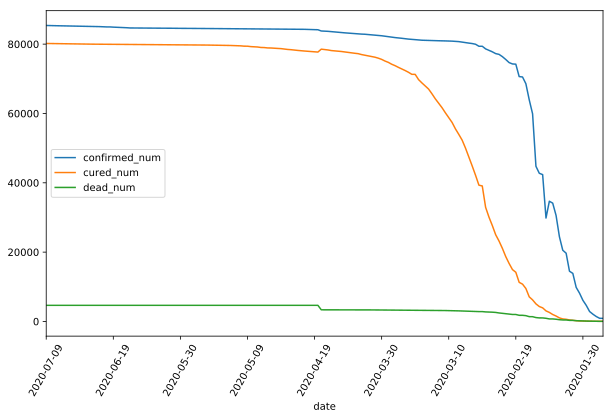

In [14]:
#深度复制dataframe
df_new=new_df.copy()
#重建index
df_new.reset_index(drop=True, inplace=True)
df_new.head(5)
#图像化展示
df_new.plot(x="date",y=["confirmed_num","cured_num","dead_num"],figsize=(10,6))
plt.xticks(rotation=60)



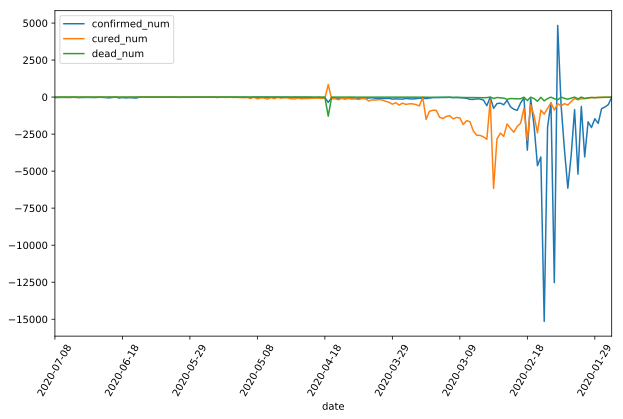

In [16]:
dfdata = df_new.set_index("date")
#环比 diff = dfdata - dfdata.shift()
#
dfdiff = dfdata.diff(periods=1).dropna()
dfdiff = dfdiff.reset_index("date")
dfdiff.plot(x = "date",y = ["confirmed_num","cured_num","dead_num"],figsize=(10,6))
plt.xticks(rotation=60)
dfdiff = dfdiff.drop("date",axis = 1).astype("float32")



In [19]:
#使用10天作为窗口
Window_Size=10

def batch_dataset(dataset):
    dataset_batched =dataset.batch(Window_Size,drop_remainder=True)
    return dataset_batched

ds_data =tf.data.Dataset.from_tensor_slices(tf.constant(dfdiff.values,dtype=tf.float32))\
    .window(Window_Size,shift=1).flat_map(batch_dataset)

ds_label =tf.data.Dataset.from_tensor_slices(tf.constant(dfdiff.values[Window_Size:],dtype=tf.float32))

ds_train = tf.data.Dataset.zip((ds_data,ds_label)).batch(32).cache()


In [21]:
#死亡人数>=0 对最后的输出做一个控制
class Block(layers.Layer):
    def __init__(self,**kwargs):
        super(Block,self).__init__(**kwargs)
    
    def call(self, inputs, x):
        x_out = tf.maximum((1+x)*inputs[:,-1,:],0.0)
        return x_out
    def get_config(self):
        config = super(Block,self).get_config()
        return config

In [23]:
tf.keras.backend.clear_session()
x_input = layers.Input(shape=(None,3),dtype=tf.float32)
x =layers.LSTM(3,return_sequences= True,input_shape=(None,3))(x_input)
x =layers.LSTM(3,return_sequences= True,input_shape=(None,3))(x)
x =layers.LSTM(3,return_sequences= True,input_shape=(None,3))(x)
x =layers.LSTM(3,input_shape=(None,3))(x)
x = layers.Dense(3)(x)

x = Block()(x_input,x)
model = models.Model(inputs=[x_input],outputs=[x])
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 3)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 3)           84        
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 3)           84        
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 3)           84        
_________________________________________________________________
lstm_3 (LSTM)                (None, 3)                 84        
_________________________________________________________________
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
block (Block)                (None, 3)                 0     